In [3]:
# import pandas and json
import pandas as pd
import json
import matplotlib.pyplot as plt

In [4]:
# read json file into DataFrame
logins_df = pd.read_json('./logins.json')
print(logins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


In [5]:
logins_df['login'] = 1
logins_df = logins_df.set_index('login_time')

In [6]:
print(logins_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
login    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB
None


In [41]:
df_agg = logins_df.resample('15min').count()
print(df_agg.head())
#print(df_agg.tail())
#print(df_agg.info())

                     login
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1


In [81]:
#import calendar
df_agg['day_of_week'] = df_agg.index.dayofweek
df_agg['hour'] = df_agg.index.hour
print(df_agg.head())

                     login  day_of_week  hour
login_time                                   
1970-01-01 20:00:00      2            3    20
1970-01-01 20:15:00      6            3    20
1970-01-01 20:30:00      9            3    20
1970-01-01 20:45:00      7            3    20
1970-01-01 21:00:00      1            3    21


3    1360
Name: day_of_week, dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 1970-01-01 20:00:00 to 1970-04-09 23:45:00
Data columns (total 3 columns):
login          1360 non-null int64
day_of_week    1360 non-null int64
hour           1360 non-null int64
dtypes: int64(3)
memory usage: 42.5 KB
None


Text(0, 0.5, '# of logins in 15 minutes')

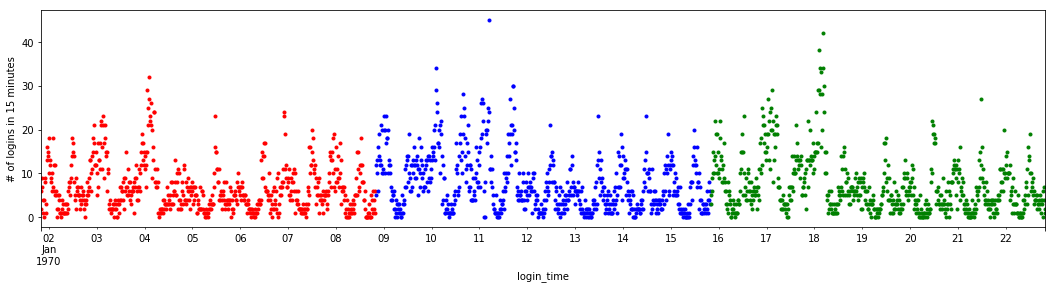

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
print(df.day_of_week.value_counts())
print(df.info())
df_agg['login'][:672].plot(marker='.', linestyle='None', color='red')
df_agg['login'][672:1344].plot(marker='.', linestyle='None', color='blue')
df_agg['login'][1344:2016].plot(marker='.', linestyle='None', color='green')
plt.ylabel('# of logins in 15 minutes')

In [83]:
df_agg_1h = logins_df.resample('H').count()
df_agg_1h['day_of_week'] = df_agg_1h.index.dayofweek
print(df_agg_1h.head())
print(len(df_agg_1h))
n_plots = len(df_agg_1h) // 504 + 1 # prepare to plot in batch of 3 weeks

                     login  day_of_week
login_time                             
1970-01-01 20:00:00     24            3
1970-01-01 21:00:00      9            3
1970-01-01 22:00:00     21            3
1970-01-01 23:00:00     58            3
1970-01-02 00:00:00     53            4
2447


Text(0, 0.5, '# of logins in 1 hour')

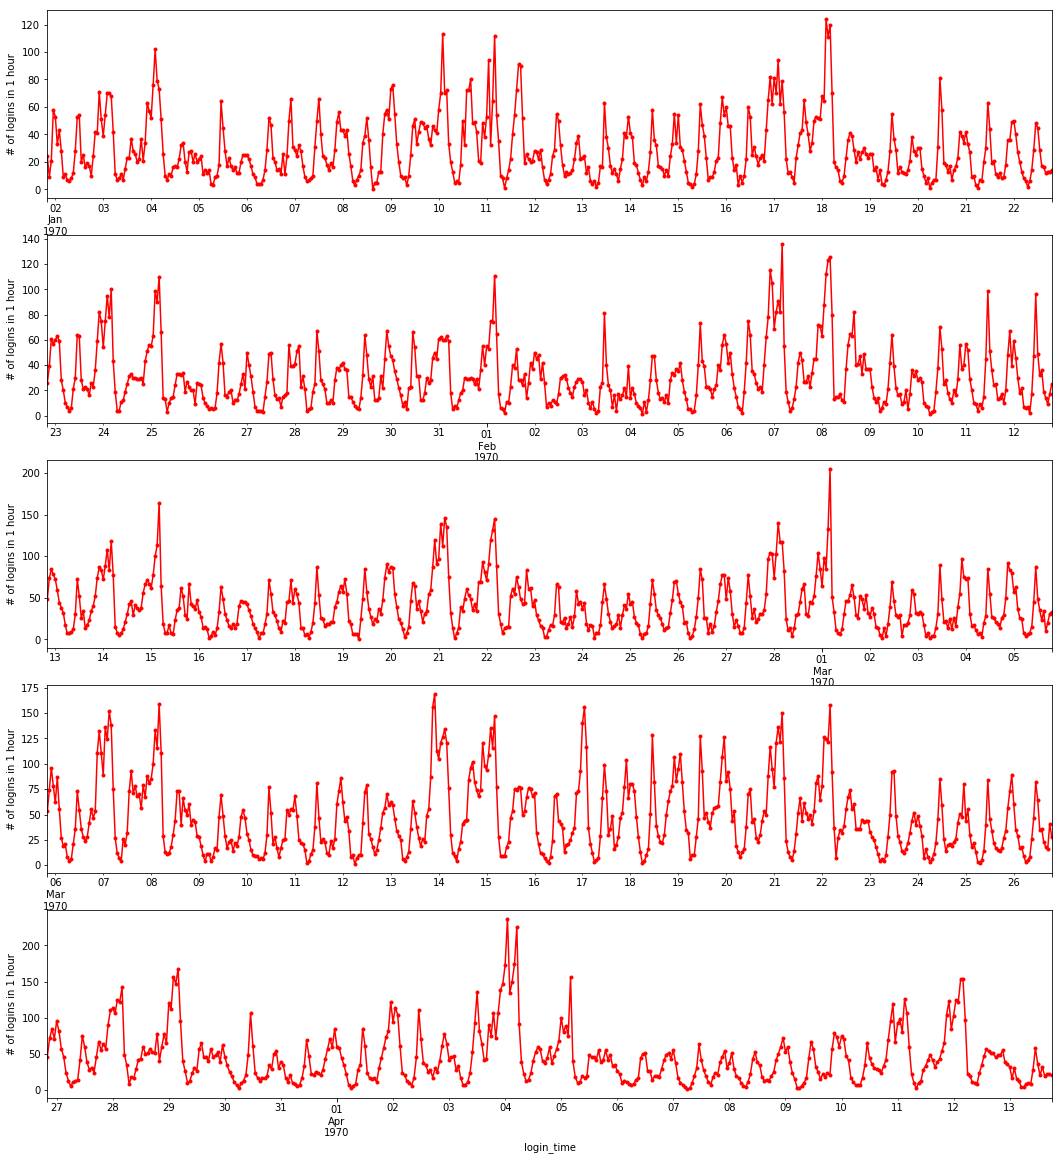

In [84]:
fig, ax = plt.subplots(n_plots, 1)
fig.set_size_inches(18, 20)
for i in range(n_plots-1):
    plt.subplot(n_plots, 1, i+1)
    df_agg_1h['login'][i*504:(i+1)*504].plot(marker='.', linestyle='-', color='red')
    plt.ylabel('# of logins in 1 hour')
    
plt.subplot(n_plots, 1, n_plots)
df_agg_1h['login'][(n_plots-1)*504:].plot(marker='.', linestyle='-', color={'red'})
plt.ylabel('# of logins in 1 hour')